In [12]:
import pandas as pd
import numpy as np

In [13]:
df=pd.read_csv('E:\Project\Input\data_final.csv')

In [14]:
df.shape

(88, 3)

In [15]:
df.head()

,GDP,MFG,Sales
0,1.430000e+13,3.820000e+12,10179303
1,2.140000e+13,2.340000e+12,12568315
2,5.060000e+12,1.030000e+12,1678183
3,3.860000e+12,7.380000e+11,986538
4,1.650000e+12,4.170000e+11,3079218


In [16]:
df.describe

<bound method NDFrame.describe of              GDP           MFG     Sales
0   1.430000e+13  3.820000e+12  10179303
1   2.140000e+13  2.340000e+12  12568315
2   5.060000e+12  1.030000e+12   1678183
3   3.860000e+12  7.380000e+11    986538
4   1.650000e+12  4.170000e+11   3079218
..           ...           ...       ...
83  1.404634e+10  1.538500e+09      9346
84  2.494907e+10  1.342382e+09         0
85  1.583077e+10  1.225058e+09      5581
86  1.521571e+10  1.107415e+09       546
87  5.935769e+09  4.926941e+07         0

[88 rows x 3 columns]>

In [17]:
for i in range(0, 100, 10):
    var =df["Sales"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

0 percentile value is 0
10 percentile value is 2655
20 percentile value is 6537
30 percentile value is 18153
40 percentile value is 34072
50 percentile value is 77417
60 percentile value is 118428
70 percentile value is 242441
80 percentile value is 448648
90 percentile value is 972524
100 percentile value is  12568315


In [18]:
#as 0 values are there-
for i in range(90, 100, 1):
    var =df["Sales"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

90 percentile value is 972524
91 percentile value is 979325
92 percentile value is 979325
93 percentile value is 986538
94 percentile value is 1008602
95 percentile value is 1678183
96 percentile value is 2719327
97 percentile value is 3079218
98 percentile value is 10179303
99 percentile value is 12568315
100 percentile value is  12568315


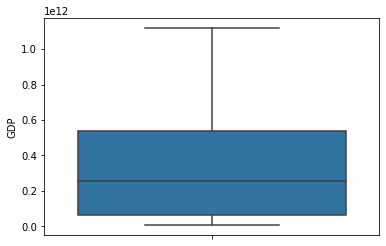

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(y=df['GDP'], data=df, showfliers=False)
plt.show()

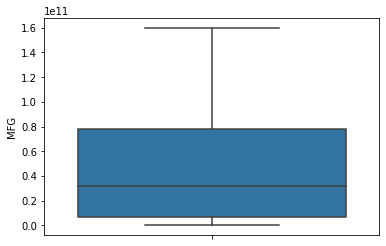

In [20]:
sns.boxplot(y=df['MFG'], data=df, showfliers=False)
plt.show()

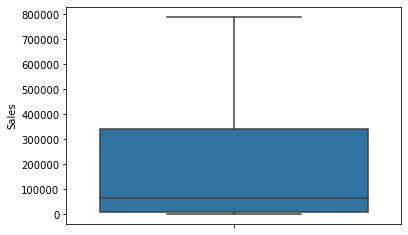

In [21]:
sns.boxplot(y=df['Sales'], data=df, showfliers=False)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


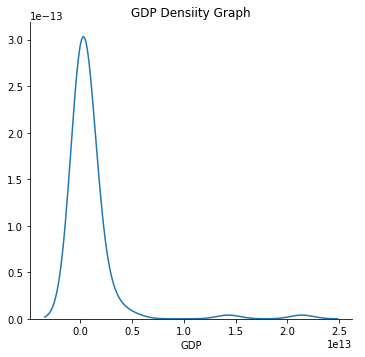

In [22]:
sns.FacetGrid(df,size=5) .map(sns.kdeplot,"GDP").add_legend();
plt.title('GDP Densiity Graph')
plt.show();

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


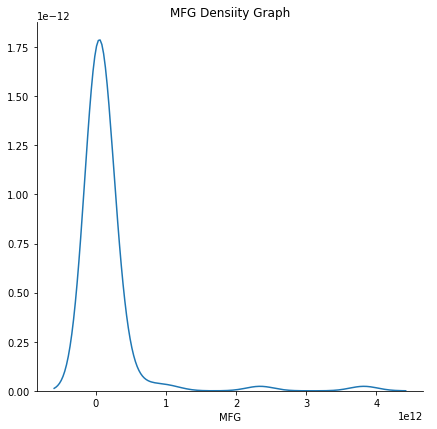

In [23]:
sns.FacetGrid(df,size=6) .map(sns.kdeplot,"MFG").add_legend();
plt.title('MFG Densiity Graph')
plt.show();

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


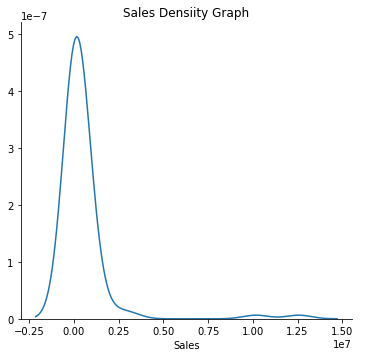

In [24]:
sns.FacetGrid(df,size=5) .map(sns.kdeplot,"Sales").add_legend();
plt.title('Sales Densiity Graph')
plt.show();

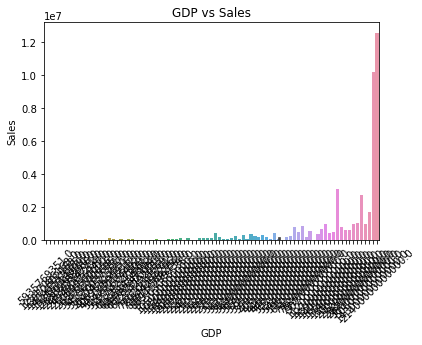

In [25]:
sns.barplot(y='Sales', x='GDP', data=df)
# plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]
plt.rcParams["figure.figsize"] = (100,50)
plt.title('GDP vs Sales')
plt.xticks(rotation=45)
plt.show()

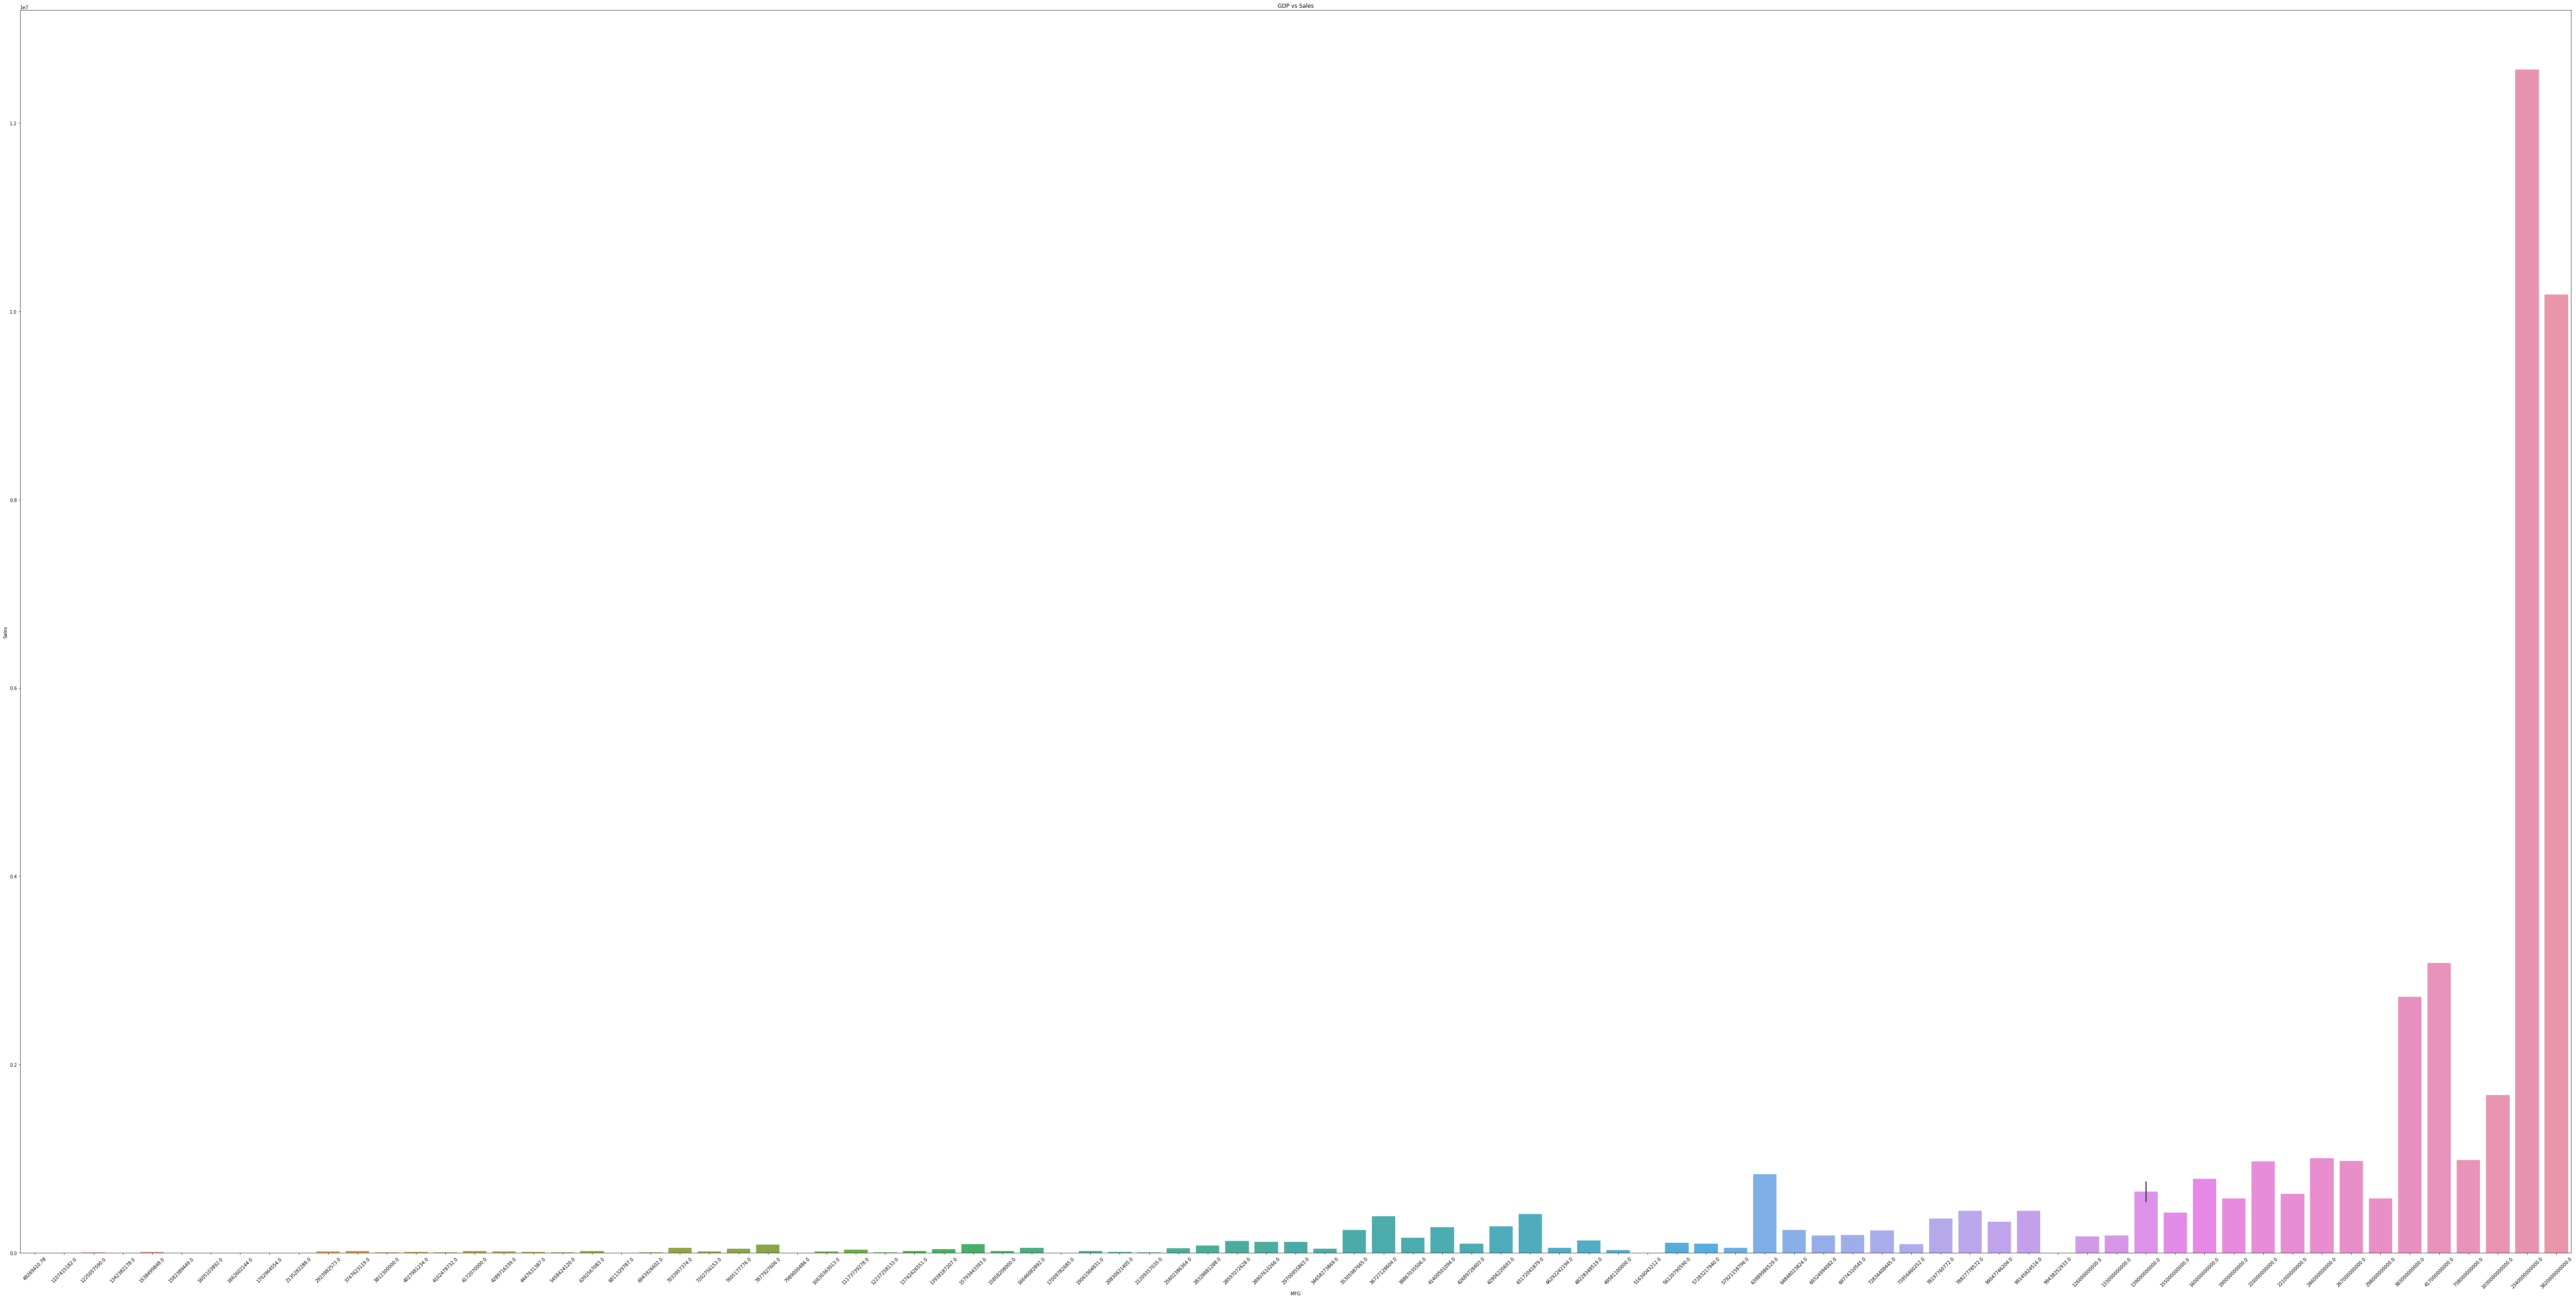

In [26]:
sns.barplot(y='Sales', x='MFG', data=df)
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]
plt.rcParams["figure.figsize"] = (50,20)
plt.title('GDP vs Sales')
plt.xticks(rotation=45)
plt.show()

In [27]:
max_norm=df.max()
min_norm=df.min()
max_norm,min_norm
#print (max_norm[2])

(GDP      2.140000e+13
 MFG      3.820000e+12
 Sales    1.256832e+07
 dtype: float64,
 GDP      5.935769e+09
 MFG      4.926941e+07
 Sales    0.000000e+00
 dtype: float64)

In [28]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [29]:
print (df.dtypes)
#print (sales.dtypes)
#df1 = (df['Sales'])
#df1 =normalize(df1)
#df['Sales']=sales

#df=normalize(df)
#df['Sales']=sales
sales=df['Sales']
df=normalize(df)
df['Sales']=sales
print(df)

GDP      float64
MFG      float64
Sales      int64
dtype: object
         GDP       MFG     Sales
0   0.668132  1.000000  10179303
1   1.000000  0.612560  12568315
2   0.236237  0.269624   1678183
3   0.180146  0.193183    986538
4   0.076847  0.109151   3079218
..       ...       ...       ...
83  0.000379  0.000390      9346
84  0.000889  0.000339         0
85  0.000463  0.000308      5581
86  0.000434  0.000277       546
87  0.000000  0.000000         0

[88 rows x 3 columns]


In [30]:
from sklearn.model_selection import train_test_split

training_set,test_set = train_test_split(df,test_size=0.3,random_state=1)
x_train = training_set.iloc[:,0:2].values  #  Select the number of independent cols instead of 2
y_train = training_set.iloc[:,2].values  #col no of dependent col
x_test = test_set.iloc[:,0:2].values  
y_test = test_set.iloc[:,2].values 

In [31]:
print(x_train[0:5])
print(x_test[0:5])

[[0.00030903 0.00042234]
 [0.0018027  0.00204941]
 [0.00286521 0.00180491]
 [0.01388536 0.01261249]
 [0.01229613 0.01016185]]
[[0.00332262 0.00276996]
 [0.00136647 0.00141603]
 [0.00692081 0.00434477]
 [0.00477068 0.00413852]
 [0.01009926 0.00115142]]


In [32]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(61, 2)
(61,)
(27, 2)
(27,)


In [33]:
#Ordinary Least Square Rgression
from statsmodels.formula.api import ols
model = ols('Sales ~ GDP + MFG', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     885.7
Date:                Sat, 29 Jan 2022   Prob (F-statistic):           1.21e-57
Time:                        16:16:52   Log-Likelihood:                -1253.7
No. Observations:                  88   AIC:                             2513.
Df Residuals:                      85   BIC:                             2521.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.809e+04   4.26e+04     -1.129      0.2

In [34]:
#Durbin Watson
from statsmodels.stats.stattools import durbin_watson

#perform Durbin-Watson test
durbin_watson(model.resid)

1.8769502601572032

In [35]:
#Ridge Model
from sklearn.metrics import mean_squared_error as mse
from math import sqrt
from sklearn.linear_model import Ridge
from tqdm import tqdm
import matplotlib.pyplot as plt

100%|██████████| 15/15 [00:00<00:00, 578.39it/s]


RMSLE for alpha =  1 is 253375.15018548118
RMSLE for alpha =  2 is 269997.30315196805
RMSLE for alpha =  3 is 306608.4872403695
RMSLE for alpha =  3.5 is 324277.37996719684
RMSLE for alpha =  4 is 340882.80641610187
RMSLE for alpha =  4.5 is 355687.4442144756
RMSLE for alpha =  5 is 369068.5465529247
RMSLE for alpha =  6 is 392099.29719233915
RMSLE for alpha =  7 is 411056.6343341812
RMSLE for alpha =  8 is 426849.54714894923
RMSLE for alpha =  9 is 440171.26940945524
RMSLE for alpha =  10 is 451540.5366280085
RMSLE for alpha =  11 is 461346.7887775745
RMSLE for alpha =  12 is 469885.52317342063
RMSLE for alpha =  13 is 477383.8603404387


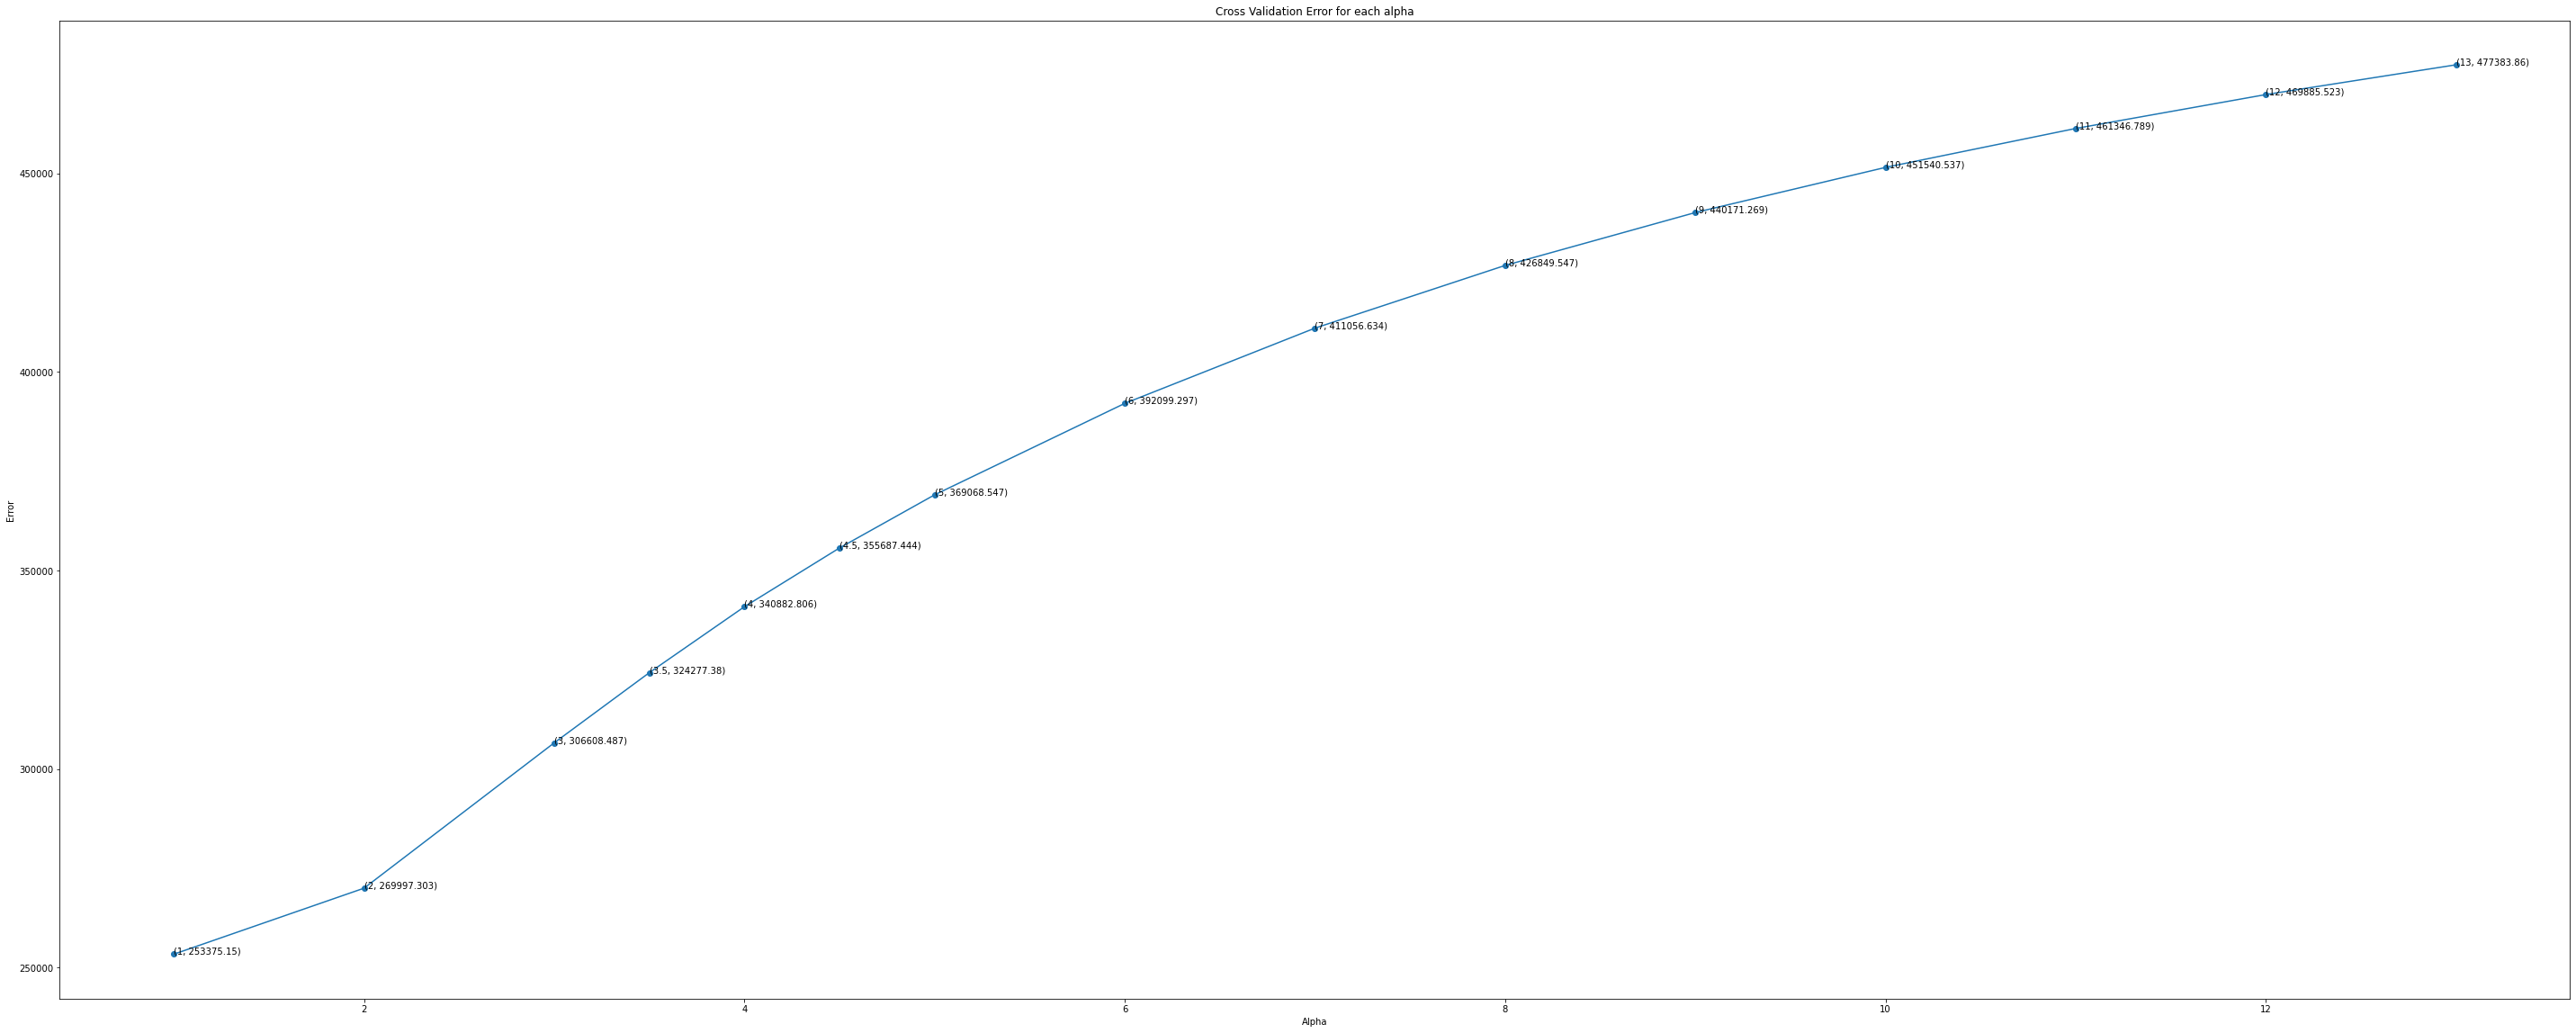

In [36]:
alpha = [1, 2, 3, 3.5, 4, 4.5, 5, 6, 7,8,9,10,11,12,13] 
cv_rmsle_array=[] 
for i in tqdm(alpha):
    model_ridge = Ridge(solver="sag", random_state=1, alpha=i)
    model_ridge.fit(x_train, y_train)
    preds_cv = model_ridge.predict(x_test)
    cv_rmsle_array.append(sqrt(mse(y_test, preds_cv)))

for i in range(len(cv_rmsle_array)):
    print ('RMSLE for alpha = ',alpha[i],'is',cv_rmsle_array[i])
    
best_alpha = np.argmin(cv_rmsle_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_rmsle_array)
ax.scatter(alpha, cv_rmsle_array)
for i, txt in enumerate(np.round(cv_rmsle_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_rmsle_array[i]))

plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha")
plt.ylabel("Error")
plt.show()

In [37]:
print("Best alpha: ",  alpha[best_alpha])
model_ridge = Ridge(solver="sag", random_state=1, alpha=alpha[best_alpha])
model_ridge.fit(x_train, y_train)
ridge_preds_tr = model_ridge.predict(x_train)
ridge_preds_cv = model_ridge.predict(x_test)
# ridge_preds_te = model.predict(X_test)

print('Train RMSLE:', sqrt(mse(y_train, ridge_preds_tr)))

ridge_rmsle = sqrt(mse(y_test, ridge_preds_cv))
print("Cross validation RMSLE: ", ridge_rmsle)

Best alpha:  1
Train RMSLE: 708858.3170861739
Cross validation RMSLE:  253375.15018548118


RMSLE for C= 0.01 is 374652.92007102096
RMSLE for C= 0.03 is 374652.8817275884
RMSLE for C= 0.1 is 374652.74752557796
RMSLE for C= 0.3 is 374652.3640912908
RMSLE for C= 1 is 374651.02207161655
RMSLE for C= 3 is 374647.18773252587
RMSLE for C= 10 is 374633.76757879363


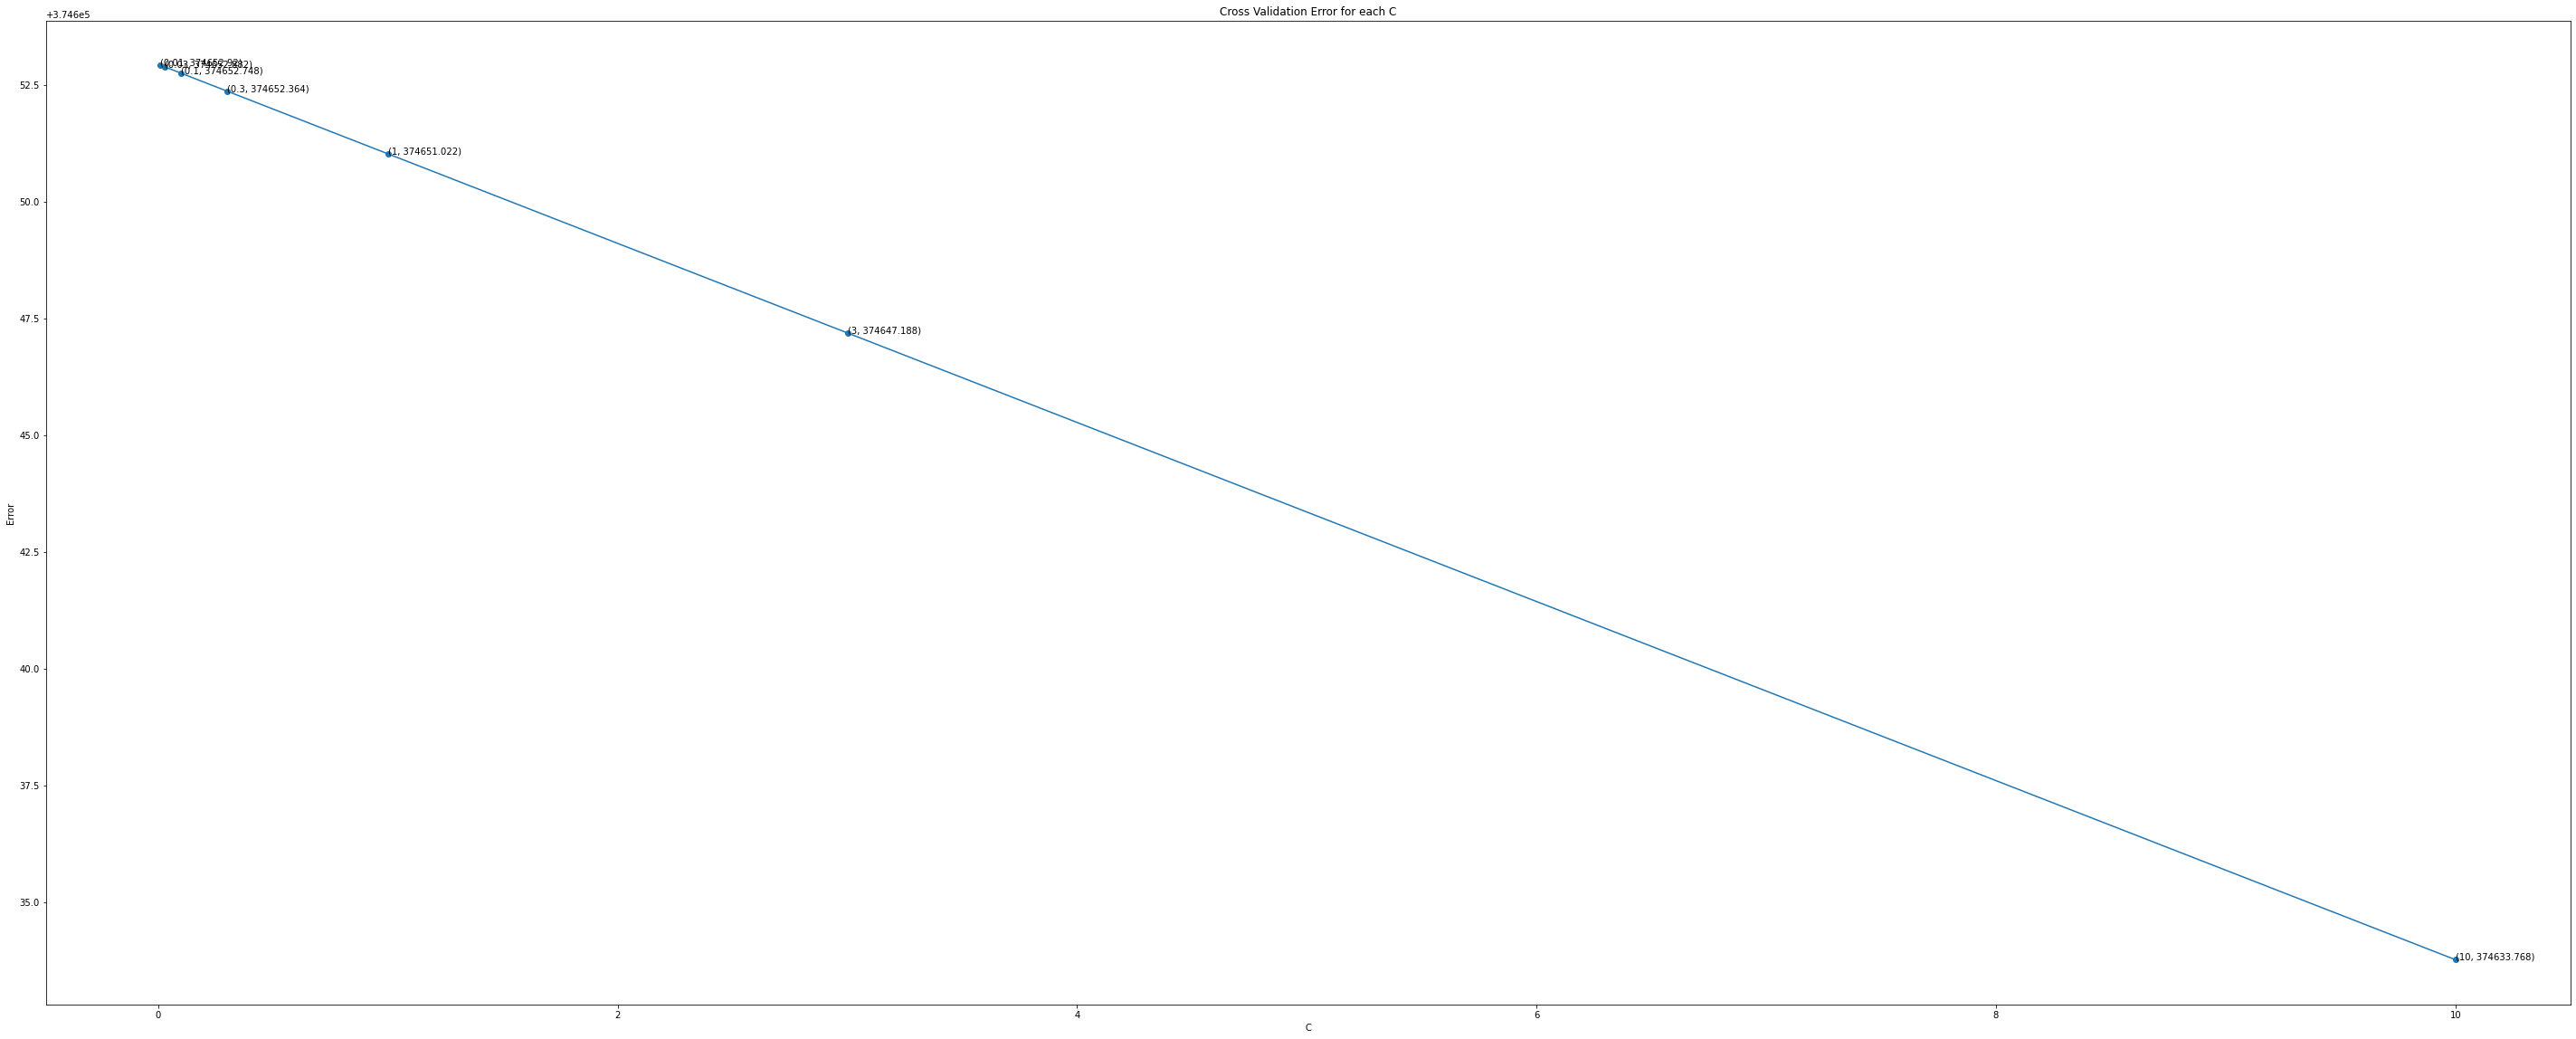

In [38]:
#SVM Regression
from sklearn.svm import SVR
c_param = [0.01, 0.03, 0.1, 0.3, 1, 3, 10]
cv_rmsle_array=[]

for i in c_param:
    model_svr = SVR(C=i, max_iter=200)
    model_svr.fit(x_train, y_train)
    preds_cv = model_svr.predict(x_test)
    cv_err = sqrt(mse(y_test, preds_cv))
    cv_rmsle_array.append(cv_err)

    print('RMSLE for C=',i, 'is', cv_err)

best_C = np.argmin(cv_rmsle_array)

fig, ax = plt.subplots()
ax.plot(c_param, cv_rmsle_array)
ax.scatter(c_param, cv_rmsle_array)
for i, txt in enumerate(np.round(cv_rmsle_array,3)):
    ax.annotate((c_param[i],np.round(txt,3)), (c_param[i],cv_rmsle_array[i]))
plt.title("Cross Validation Error for each C")
plt.xlabel("C")
plt.ylabel("Error")
plt.show()


In [39]:
best_C = c_param[best_C]
print('Best C: ', best_C)
model_svr = SVR(C=best_C, max_iter=200)
model_svr.fit(x_train, y_train)

Best C:  10


SVR(C=10, max_iter=200)

In [40]:
svr_preds_tr = model_svr.predict(x_train)
svr_preds_cv = model_svr.predict(x_test)
print('Train RMSLE:', sqrt(mse(y_train, svr_preds_tr)))

svr_rmsle = sqrt(mse(y_test, svr_preds_cv))
print("Cross validation RMSLE: ", svr_rmsle)

Train RMSLE: 2139242.5856631957
Cross validation RMSLE:  374633.76757879363


RMSLE for N=10 is 122221.1538526456	 elapsed time:0:00:00.015621
RMSLE for N=20 is 121183.5963650076	 elapsed time:0:00:00.046862


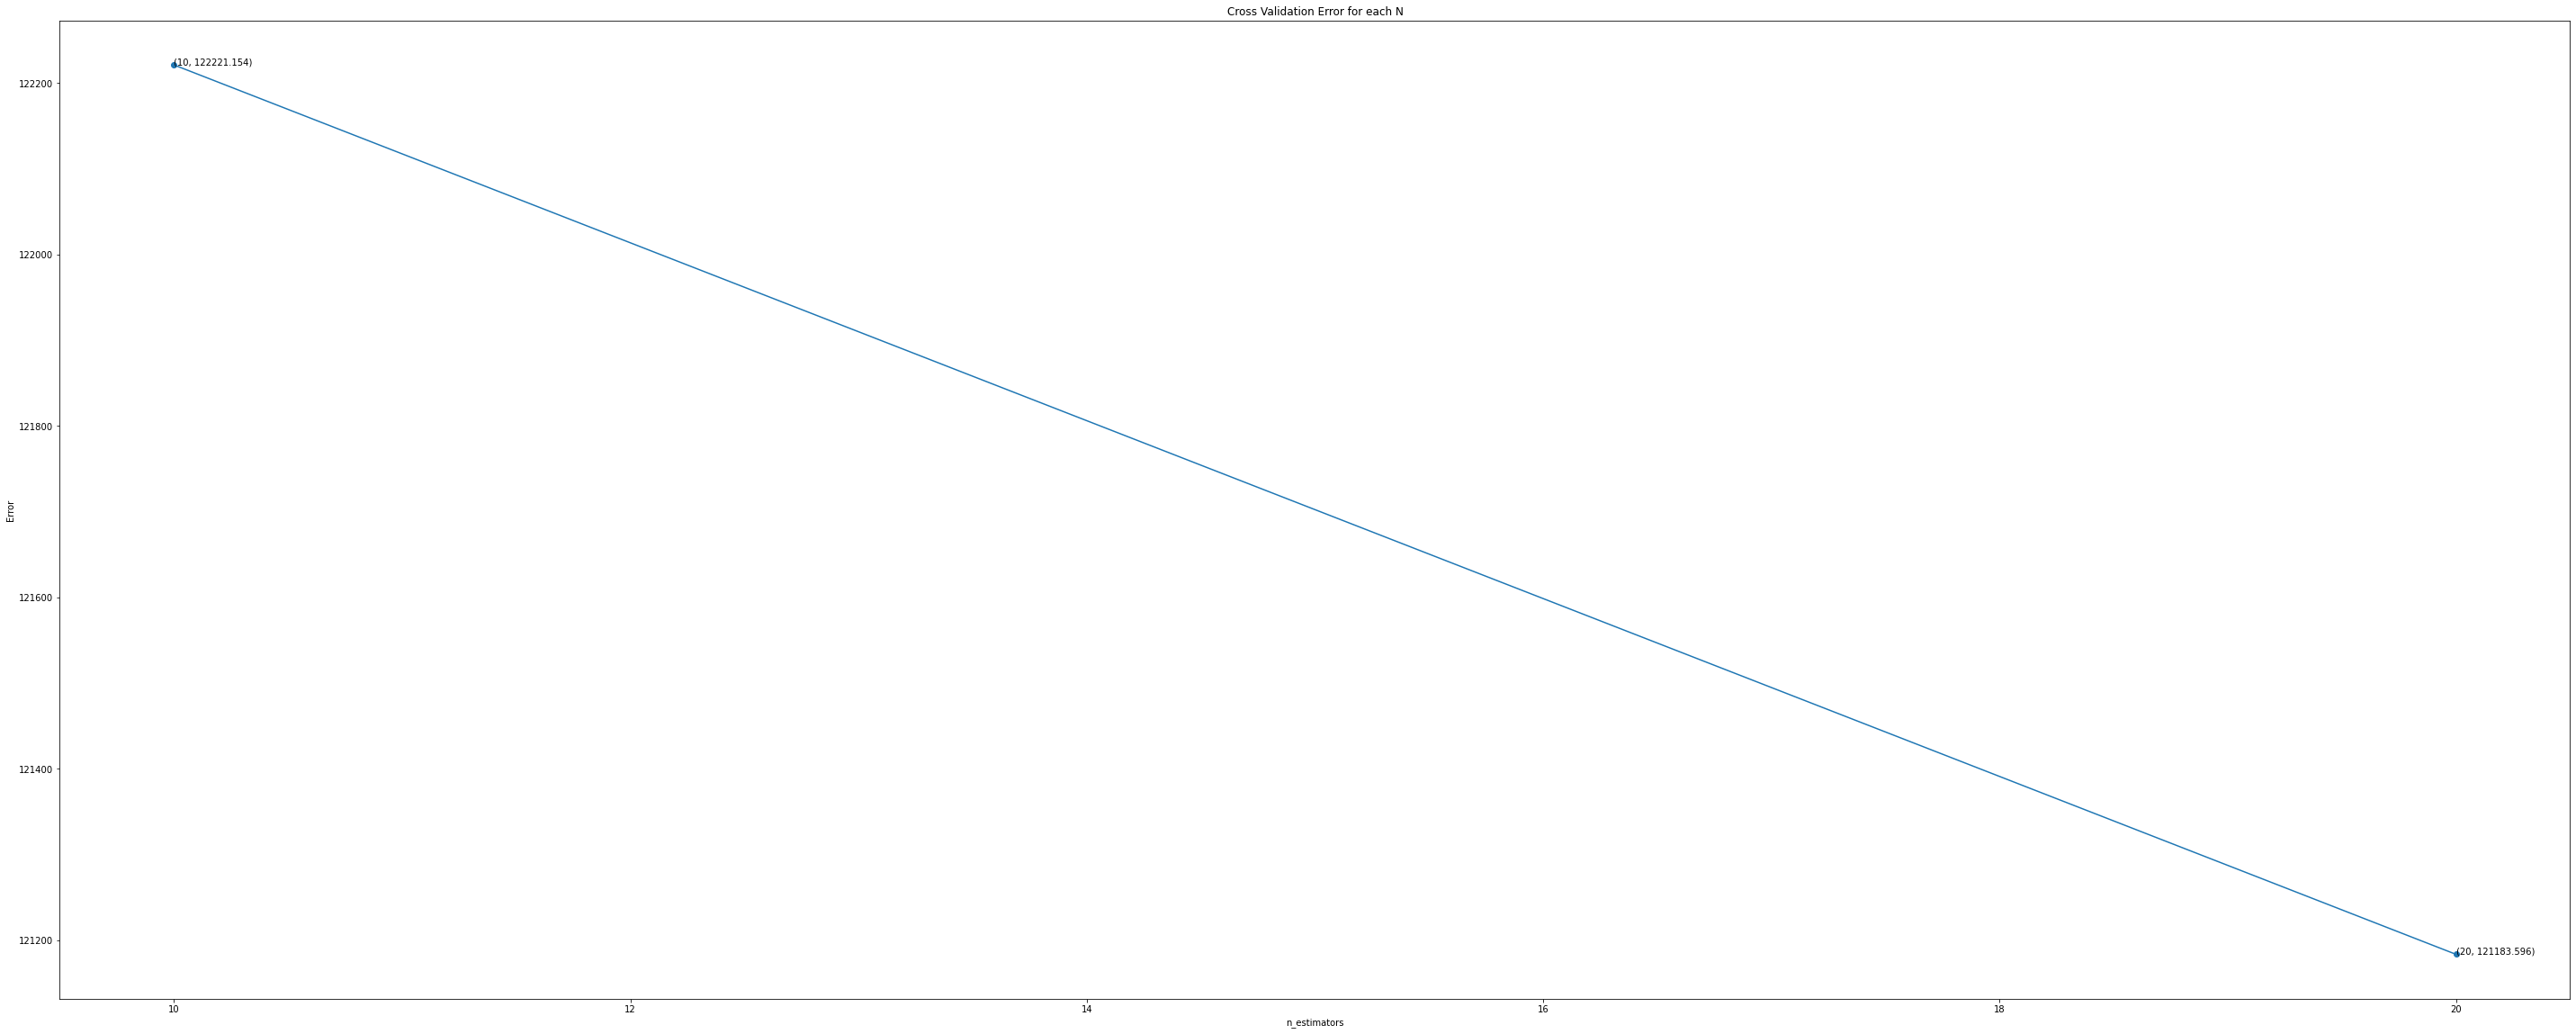

In [41]:
#RandomForest Regression
from sklearn.ensemble import RandomForestRegressor
import datetime
dt = datetime.datetime #to track time

estimators = [10, 20]
cv_rmsle_array=[]
t0 = dt.now()
for i in estimators:
    model_rf = RandomForestRegressor(n_estimators=i, min_samples_split=10, max_features='sqrt', max_samples=0.9, random_state=42)
    model_rf.fit(x_train, y_train)
    preds_cv = model_rf.predict(x_test)
    cv_err = sqrt(mse(y_test, preds_cv))
    cv_rmsle_array.append(cv_err)

    print (f'RMSLE for N={i} is {cv_err}\t elapsed time:{dt.now() - t0}')

best_N = np.argmin(cv_rmsle_array)

fig, ax = plt.subplots()
ax.plot(estimators, cv_rmsle_array)
ax.scatter(estimators, cv_rmsle_array)
for i, txt in enumerate(np.round(cv_rmsle_array,3)):
    ax.annotate((estimators[i],np.round(txt,3)), (estimators[i],cv_rmsle_array[i]))
plt.title("Cross Validation Error for each N")
plt.xlabel("n_estimators")
plt.ylabel("Error")
plt.show()

In [42]:
best_N = estimators[best_N]
print('Best n_estimators: ', best_N)
model_rf = RandomForestRegressor(n_estimators=best_N, min_samples_split=10, max_features='sqrt', max_samples=0.9, random_state=42)
model_rf.fit(x_train, y_train)

Best n_estimators:  20


RandomForestRegressor(max_features='sqrt', max_samples=0.9,
                      min_samples_split=10, n_estimators=20, random_state=42)

In [43]:
rf_preds_tr = model_rf.predict(x_train)
rf_preds_cv = model_rf.predict(x_test)
# rf_preds_te = model.predict(X_test)

print('Train RMSLE:', sqrt(mse(y_train, rf_preds_tr)))

rf_rmsle = sqrt(mse(y_test, rf_preds_cv))
print("Cross validation RMSLE: ", rf_rmsle)

Train RMSLE: 359101.73667021526
Cross validation RMSLE:  121183.5963650076


In [44]:
#LightGBM Regression
from lightgbm import LGBMRegressor
from scipy.stats import uniform
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV 
lgb_model = LGBMRegressor(subsample=0.9)

params = {'learning_rate': uniform(0, 1),
          'n_estimators': sp_randint(200, 1500),
          'num_leaves': sp_randint(20, 200),
          'max_depth': sp_randint(2, 15),
          'min_child_weight': uniform(0, 2),
          'colsample_bytree': uniform(0, 1),
         }
lgb_random = RandomizedSearchCV(lgb_model, param_distributions=params, n_iter=10, cv=3, random_state=42, 
                                scoring='neg_root_mean_squared_error', verbose=10, return_train_score=True)
lgb_random = lgb_random.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] colsample_bytree=0.3745401188473625, learning_rate=0.9507143064099162, max_depth=12, min_child_weight=1.5593820005455385, n_estimators=1244, num_leaves=122 
[CV]  colsample_bytree=0.3745401188473625, learning_rate=0.9507143064099162, max_depth=12, min_child_weight=1.5593820005455385, n_estimators=1244, num_leaves=122, score=(train=-2473718.880, test=-884553.060), total=   0.0s
[CV] colsample_bytree=0.3745401188473625, learning_rate=0.9507143064099162, max_depth=12, min_child_weight=1.5593820005455385, n_estimators=1244, num_leaves=122 
[CV]  colsample_bytree=0.3745401188473625, learning_rate=0.9507143064099162, max_depth=12, min_child_weight=1.5593820005455385, n_estimators=1244, num_leaves=122, score=(train=-1890677.979, test=-2038081.100), total=   0.1s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] colsample_bytree=0.3745401188473625, learning_rate=0.9507143064099162, max_depth=12, min_child_weight=1.5593820005455385, n_estimators=1244, num_leaves=122 
[CV]  colsample_bytree=0.3745401188473625, learning_rate=0.9507143064099162, max_depth=12, min_child_weight=1.5593820005455385, n_estimators=1244, num_leaves=122, score=(train=-1536770.722, test=-2657633.096), total=   0.2s
[CV] colsample_bytree=0.44583275285359114, learning_rate=0.09997491581800289, max_depth=12, min_child_weight=1.7323522915498704, n_estimators=1323, num_leaves=123 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s


[CV]  colsample_bytree=0.44583275285359114, learning_rate=0.09997491581800289, max_depth=12, min_child_weight=1.7323522915498704, n_estimators=1323, num_leaves=123, score=(train=-2473718.880, test=-884553.060), total=   0.0s
[CV] colsample_bytree=0.44583275285359114, learning_rate=0.09997491581800289, max_depth=12, min_child_weight=1.7323522915498704, n_estimators=1323, num_leaves=123 
[CV]  colsample_bytree=0.44583275285359114, learning_rate=0.09997491581800289, max_depth=12, min_child_weight=1.7323522915498704, n_estimators=1323, num_leaves=123, score=(train=-1890677.979, test=-2038081.100), total=   0.2s
[CV] colsample_bytree=0.44583275285359114, learning_rate=0.09997491581800289, max_depth=12, min_child_weight=1.7323522915498704, n_estimators=1323, num_leaves=123 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s remaining:    0.0s


[CV]  colsample_bytree=0.44583275285359114, learning_rate=0.09997491581800289, max_depth=12, min_child_weight=1.7323522915498704, n_estimators=1323, num_leaves=123, score=(train=-1536770.722, test=-2657633.094), total=   0.2s
[CV] colsample_bytree=0.7080725777960455, learning_rate=0.020584494295802447, max_depth=3, min_child_weight=1.4439975445336495, n_estimators=1005, num_leaves=149 
[CV]  colsample_bytree=0.7080725777960455, learning_rate=0.020584494295802447, max_depth=3, min_child_weight=1.4439975445336495, n_estimators=1005, num_leaves=149, score=(train=-2473718.880, test=-884553.060), total=   0.0s
[CV] colsample_bytree=0.7080725777960455, learning_rate=0.020584494295802447, max_depth=3, min_child_weight=1.4439975445336495, n_estimators=1005, num_leaves=149 
[CV]  colsample_bytree=0.7080725777960455, learning_rate=0.020584494295802447, max_depth=3, min_child_weight=1.4439975445336495, n_estimators=1005, num_leaves=149, score=(train=-1890677.979, test=-2038081.100), total=   0.1s

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.8s remaining:    0.0s


[CV]  colsample_bytree=0.7080725777960455, learning_rate=0.020584494295802447, max_depth=3, min_child_weight=1.4439975445336495, n_estimators=1005, num_leaves=149, score=(train=-1536770.722, test=-2657633.093), total=   0.1s
[CV] colsample_bytree=0.18182496720710062, learning_rate=0.18340450985343382, max_depth=13, min_child_weight=1.2233063209765618, n_estimators=452, num_leaves=108 
[CV]  colsample_bytree=0.18182496720710062, learning_rate=0.18340450985343382, max_depth=13, min_child_weight=1.2233063209765618, n_estimators=452, num_leaves=108, score=(train=-2473718.880, test=-884553.060), total=   0.0s
[CV] colsample_bytree=0.18182496720710062, learning_rate=0.18340450985343382, max_depth=13, min_child_weight=1.2233063209765618, n_estimators=452, num_leaves=108 
[CV]  colsample_bytree=0.18182496720710062, learning_rate=0.18340450985343382, max_depth=13, min_child_weight=1.2233063209765618, n_estimators=452, num_leaves=108, score=(train=-1890677.979, test=-2038081.100), total=   0.0s


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.9s remaining:    0.0s


[CV]  colsample_bytree=0.2912291401980419, learning_rate=0.6118528947223795, max_depth=11, min_child_weight=0.09333132642723085, n_estimators=899, num_leaves=34, score=(train=-1890677.979, test=-2038081.101), total=   0.1s
[CV] colsample_bytree=0.2912291401980419, learning_rate=0.6118528947223795, max_depth=11, min_child_weight=0.09333132642723085, n_estimators=899, num_leaves=34 
[CV]  colsample_bytree=0.2912291401980419, learning_rate=0.6118528947223795, max_depth=11, min_child_weight=0.09333132642723085, n_estimators=899, num_leaves=34, score=(train=-1536770.722, test=-2657633.094), total=   0.1s
[CV] colsample_bytree=0.45606998421703593, learning_rate=0.7851759613930136, max_depth=4, min_child_weight=0.7649239825343255, n_estimators=1467, num_leaves=83 
[CV]  colsample_bytree=0.45606998421703593, learning_rate=0.7851759613930136, max_depth=4, min_child_weight=0.7649239825343255, n_estimators=1467, num_leaves=83, score=(train=-2473718.880, test=-884553.060), total=   0.0s
[CV] colsa

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    2.5s finished


In [45]:
df1 = pd.DataFrame(lgb_random.cv_results_)
df1[['param_learning_rate', 'param_n_estimators', 'param_num_leaves', 'param_max_depth', 'param_min_child_weight', 'param_colsample_bytree', 'mean_train_score', 'mean_test_score']]

,param_learning_rate,param_n_estimators,param_num_leaves,param_max_depth,param_min_child_weight,param_colsample_bytree,mean_train_score,mean_test_score
0,0.950714,1244,122,12,1.55938,0.37454,-1.967056e+06,-1.860089e+06
1,0.0999749,1323,123,12,1.73235,0.445833,-1.967056e+06,-1.860089e+06
2,0.0205845,1005,149,3,1.444,0.708073,-1.967056e+06,-1.860089e+06
3,0.183405,452,108,13,1.22331,0.181825,-1.967056e+06,-1.860089e+06
4,0.611853,899,34,11,0.0933313,0.291229,-1.967056e+06,-1.860089e+06
5,0.785176,1467,83,4,0.764924,0.45607,-1.967056e+06,-1.860089e+06
6,0.85994,366,37,8,0.341048,0.466763,-1.967056e+06,-1.860089e+06
7,0.965632,764,149,3,0.770833,0.948886,-1.967056e+06,-1.860089e+06
8,0.440152,975,194,8,1.21999,0.684233,-1.967056e+06,-1.860089e+06
9,0.391061,1225,153,3,1.32504,0.173365,-1.967056e+06,-1.860089e+06


In [46]:
best_params = lgb_random.best_params_
print(best_params)

{'colsample_bytree': 0.6842330265121569, 'learning_rate': 0.4401524937396013, 'max_depth': 8, 'min_child_weight': 1.2199933155652418, 'n_estimators': 975, 'num_leaves': 194}


In [47]:
model_lgb = LGBMRegressor(**best_params, subsample=0.9, random_state=42, n_jobs=-1)
model_lgb.fit(x_train, y_train)

LGBMRegressor(colsample_bytree=0.6842330265121569,
              learning_rate=0.4401524937396013, max_depth=8,
              min_child_weight=1.2199933155652418, n_estimators=975,
              num_leaves=194, random_state=42, subsample=0.9)

In [48]:
lgb_preds_tr = model_lgb.predict(x_train)
lgb_preds_cv = model_lgb.predict(x_test)

print('Train RMSLE:', sqrt(mse(y_train, lgb_preds_tr)))

lgb_rmsle = sqrt(mse(y_test, lgb_preds_cv))
print("Cross validation RMSLE: ", lgb_rmsle)

Train RMSLE: 1857512.851607434
Cross validation RMSLE:  399518.51567903504


In [49]:
from prettytable import PrettyTable
x=PrettyTable()
x.field_names=["Model",  "Train_RMSLE", "Validation_RMSLE"]
x.add_row(["Ridge", "0.056400425760030175", "0.02015983448739797"])
x.add_row(["SVR", "0.16549336546923635", "0.08933149247769537"])
x.add_row(["Random Forest","0.028571987308578378","0.009641992292921335"])
x.add_row(["LightGBM", "0.14778186700438548", "0.033612381598677035"])

print(x)

+---------------+----------------------+----------------------+
|     Model     |     Train_RMSLE      |   Validation_RMSLE   |
+---------------+----------------------+----------------------+
|     Ridge     | 0.056400425760030175 | 0.02015983448739797  |
|      SVR      | 0.16549336546923635  | 0.08933149247769537  |
| Random Forest | 0.028571987308578378 | 0.009641992292921335 |
|    LightGBM   | 0.14778186700438548  | 0.033612381598677035 |
+---------------+----------------------+----------------------+


In [50]:
max_norm1 = max_norm[0:2]
min_norm1 = min_norm[0:2]

In [51]:
sample_test=[[398590210120.337,125550764517.341]]
sample_test[0]=(sample_test[0]-min_norm1)/(max_norm1-min_norm1)
sample_test

[GDP    0.018353
 MFG    0.032854
 dtype: float64]

In [52]:
# print(model_ridge.predict(sample_test))
# print(model_svr.predict(sample_test))
# print(model_rf.predict(sample_test))
# print(model_lgb.predict(sample_test))

print(model_ridge.predict(sample_test)*(max_norm[2]-min_norm[2])+min_norm[2])
print(model_svr.predict(sample_test)*(max_norm[2]-min_norm[2])+min_norm[2])
print(model_rf.predict(sample_test)*(max_norm[2]-min_norm[2])+min_norm[2])
print(model_lgb.predict(sample_test)*(max_norm[2]-min_norm[2])+min_norm[2])

[5.09126751e+12]
[1.088225e+12]
[4.17111046e+12]
[2.75129503e+12]


In [53]:
def norm_process(x,y):
  global max_norm,min_norm
  max_norm=max_norm[0:2]
  min_norm=min_norm[0:2]
  sample_test=[[x,y]]
  sample_test[0]=(sample_test[0]-min_norm)/(max_norm-min_norm)
  return(sample_test)

In [54]:
gdp = float(input("Enter the GDP : "))
mfg = float(input("Enter the MFG : "))
inputs = norm_process(gdp,mfg)
print(model_ridge.predict(inputs))
print(model_svr.predict(inputs))
print(model_rf.predict(inputs))
print(model_lgb.predict(inputs))

Enter the GDP : 10179303
Enter the MFG : 14300000000000
[16999013.40786849]
[86620.88518372]
[4690284.11906486]
[399115.69751136]


In [55]:
#Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = df.columns

vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
  
print(vif_data)

  feature        VIF
0     GDP  19.856229
1     MFG   7.192341
2   Sales  23.443766


In [56]:
#Output files for each Model

#import csv

import csv

#Write the predicted and actual testing values of sales to a file(Ridge Model)
file = open('E:\\Project\\Output\\ridge_model.csv','w')
writer = csv.writer(file)
for i in range(len(y_test)):
  writer.writerow([y_test[i],ridge_preds_cv[i]])
file.close()

# Write the predicted and actual testing values of sales to a file (SVR Model)
file = open('E:\\Project\\Output\\svr_model.csv',"w")
writer = csv.writer(file)
for i in range(len(y_test)):
  writer.writerow([y_test[i], svr_preds_cv[i]])
file.close()


# Write the predicted and actual testing values of sales to a file(RF Model)
file = open("E:\\Project\\Output\\rf_model.csv", "w")
writer = csv.writer(file)
for i in range(len(y_test)):
  writer.writerow([y_test[i], rf_preds_cv[i]])
file.close()

# Write the predicted and actual testing values of sales to a file (LGB Model)
file = open("E:\\Project\\Output\\lgb_model.csv", "w")
writer = csv.writer(file)
for i in range(len(y_test)):
  writer.writerow([y_test[i], lgb_preds_cv[i]])
file.close()




In [57]:
#rough work 
#to denormalize 

#y_test[i]= y_test[i]*(max_norm[2]-min_norm[2])+min_norm[2]

In [58]:
print (df.dtypes)
#print (sales.dtypes)
#df1 = (df['Sales'])
#df1 =normalize(df1)
#df['Sales']=sales

#df=normalize(df)
#df['Sales']=sales
#sales=df['Sales']
df=normalize(df)
#df['Sales']=sales
print(df)

GDP      float64
MFG      float64
Sales      int64
dtype: object
         GDP       MFG     Sales
0   0.668132  1.000000  0.809918
1   1.000000  0.612560  1.000000
2   0.236237  0.269624  0.133525
3   0.180146  0.193183  0.078494
4   0.076847  0.109151  0.244998
..       ...       ...       ...
83  0.000379  0.000390  0.000744
84  0.000889  0.000339  0.000000
85  0.000463  0.000308  0.000444
86  0.000434  0.000277  0.000043
87  0.000000  0.000000  0.000000

[88 rows x 3 columns]


In [59]:
y_test[i]= y_test[i]*(max_norm[1]-min_norm[1])+min_norm[1]

In [60]:
print (y_test[1:27])

[              7022              55456              20482
               9353               5581              34072
             388880             116571              96756
             274299             110179                  0
             245526                  0               4133
             972524            1678183             413164
              18620             128395             450399
               2543              53520              32194
               3353 452389125171489600]


In [61]:
# #def Denormalize(df):
#    # result = df.copy()
#    # for feature_name in df.columns:
#       #  max_value = df[feature_name].max()
#         min_value = df[feature_name].min()
#         result[feature_name] = (df[feature_name]) * (max_value - min_value)+ min_value
#     return result

In [62]:
#df1=Denormalize(df)

In [63]:
#print(df1)